## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [114]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [115]:
#reading the data
df= pd.read_csv('ab_data.csv')

b. Use the cell below to find the number of rows in the dataset.

In [116]:
## reading number of rows
df.shape[0]

294478

In [117]:
# Investigating the dataset
df.head(3)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


c. The number of unique users in the dataset.

In [5]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [6]:
df.converted.mean()

0.11965919355605512

In [7]:
#another solution:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [118]:
df.query('group=="treatment" and landing_page=="old_page"').shape[0]+df.query('group=="control" and landing_page=="new_page"').shape[0]

3893

f. Do any of the rows have missing values?

In [119]:
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [120]:
#first solution
df2= df.query('group=="treatment" and landing_page=="new_page"')+df.query('group=="control" and landing_page=="old_page"')

In [121]:
#second solution

drop1 = df.query("landing_page == 'new_page' and group == 'control'").index
drop2 = df.query("landing_page == 'old_page' and group == 'treatment'").index
total_drop = drop1.append(drop2)
df2= df.drop(total_drop)

In [122]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [124]:
##another double check:

# This will give 0 if group and landing page don't match

df2.query('group=="treatment" and landing_page=="old_page"').shape[0]+df2.query('group=="control" and landing_page=="new_page"').shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [125]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [126]:
df2[df2.duplicated(['user_id'])]['user_id']


2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [127]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [128]:
df2.drop(df2[df2.user_id.duplicated()].index, inplace=True)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [129]:
df2['converted'].mean()

0.11959708724499628

In [130]:
#another solution
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [131]:
df2.query('group=="control"')['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [132]:
df2.query('group=="treatment"')['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [133]:
(df2['landing_page']=='new_page').mean()

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

### Conclusion:


Based on the results above, the coversion rate in the control group from the old page to the new one is slightly higer than that in the treatment group by .0014. The conversion rate in gerenal is small. Morever, the probability that the new page will show up to users is 0.5, which is not so high. Thus, there is no enough evidence that the new page will lead to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

## The null and alternative hypotheses are as follows:

$$ H_0: \ 𝑝𝑛𝑒𝑤 <=𝑝𝑜𝑙𝑑 $$

$$H_1: \ 𝑝𝑛𝑒𝑤 >𝑝𝑜𝑙𝑑$$


Or equivalently, we can state these hypotheses in terms of words as follows:

### Null hypothesis:

the conversion rate of the new page is less than or equal the conversion rate of the old page.

### Alternative hypothesis:

the conversion rate of the new page is better than the conversion rate of the old page.



`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [24]:
df2.head(3)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


a. What is the **conversion rate** for $p_{new}$ under the null? 

In [134]:
# we assume that the conversion rate in in two pages is the same (null hypothesis)
p_new=df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [135]:
# we assume that the conversion rate in in two pages is the same (null hypothesis)
p_old=df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [136]:
n_new=df2.query('group=="treatment"').user_id.count()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [137]:
n_old=df2.query('group=="control"').user_id.count()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [138]:
#np.random.choice is used to generate a random sample from an array of 0's and 1's

In [139]:
new_page_converted= np.random.choice(a= [0,1], size =n_new , p=[p_new, 1-p_new])

In [140]:
new_page_converted

array([1, 1, 1, ..., 1, 1, 1])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [141]:
old_page_converted=np.random.choice([0,1],size= n_old, p=[p_old, 1-p_old])

In [142]:
old_page_converted

array([1, 1, 0, ..., 1, 1, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [143]:
p1_new= new_page_converted.mean()/n_new
p1_new

6.0644576676005167e-06

In [144]:
p1_old= old_page_converted.mean()/n_old
p1_old

6.0549071344062811e-06

In [145]:
p1_new - p1_old

9.5505331942355643e-09

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [147]:
## simulation steps
p_diffs=[]
for i in range (10000):
    old_page_converted=np.random.choice([0,1],size= n_old, p=[p_old, 1-p_old])
    new_page_converted= np.random.choice(a= [0,1], size =n_new , p=[p_new, 1-p_new])
    p_diffs.append(new_page_converted.mean() -old_page_converted.mean())
    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0,0.5,'Frequency values')

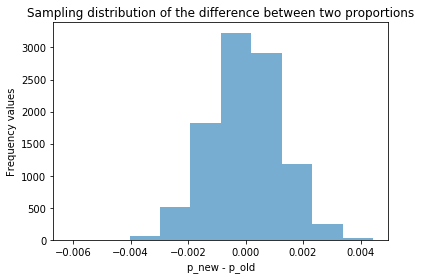

In [148]:
## Plottin a histogram
plt.hist(p_diffs, alpha=.6);
plt.title('Sampling distribution of the difference between two proportions')
plt.xlabel('p_new - p_old')
plt.ylabel('Frequency values')


### The graph shows that the sampling distribution of the difference between the two proportions is normal by the central limit theorem

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [149]:
p_con =df2.query('group=="control"')['converted'].mean()

In [150]:
p_treat =df2.query('group=="treatment"')['converted'].mean()

In [152]:
## difference in two proportions
diff_prop = p_treat - p_con

In [153]:
## calculating the p-value
(p_diffs > diff_prop ).mean()

0.9042

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?


### Conclusion:
In part (j), the p-value has been computed. This value is compared to the alpha value (Type I error :5%) to test if the difference in the conversion rate between the old and new pages is statistically significant. Since the p-values is greater than alpha, we fail to reject the null hypothesis. Thus, there is no difference between the two pages.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [154]:
df2.head(2)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0


In [155]:
import statsmodels.api as sm

#number of users who converted in the control group
convert_old = df2.query('group=="control" and converted ==1').shape[0]


#number of users who converted in the treatment group
convert_new = df2.query('group=="treatment" and converted == 1').shape[0]


In [156]:
#total number of users in control group
n_old = df2.query('group=="control"').converted.count()

#total number of users in treatment group
n_new = df2.query('group=="treatment"').converted.count()


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [157]:
#the code below returns z-statistic value and the corresponding p-value
#the first argument is the number of successes (number of converted users in two groups)
# the second argument is an array of the number of observations in the two groups
# the third argument is the alternative and if it is larger, it means that we test that p_new> p_old to be consistent with the alternative hypothesis stated number 1 in AB test part

stat, pval= sm.stats.proportions_ztest([convert_new, convert_old], [n_new,n_old], alternative='larger')

In [158]:
print(stat) # gives the calculated value for the test statistic
print( pval)

-1.31092419842
0.905058312759


In [159]:
# This to calculate the tabulated z-score at 95% confidence interval

import scipy.stats as st
st.norm.ppf(.95) #gives z-value (critical value) from standard normal table


1.6448536269514722

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

### Yes, the p-value is consistent with the results obtained in parts (j and k). The reason is that the p-value is greater than alpha (5%), which means that we fail to reject the null hypothesis. Another way to confirm this conclusion is to compare the absolute value of the test statistic (1.31) with the critical value (1.64) computed from the z-table. Since the test is one-sided and the test statistic value is less than the critical value, we fail to reject the null hypothesis.Thus, two the findings are consistent.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

### A logistic regression model should be applied since the response variable (conversion rate) is a binary variable.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [161]:
df2.head(2)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0


In [162]:
# creating the intercept
df2['intercept']=1

# creating a dummy variable for the variable group
df2['ab_page']=pd.get_dummies(df2['group'])['treatment']

In [163]:
df2.head(2)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [164]:
## running the first logistic regression model
log_model1= sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results=log_model1.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [165]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-11-12 06:53 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

### Comment on the results of model 1 (including one categorical variable):


The p-value for ab_page is 0.1899. This value indicates that the ab_variable is not statistically significant. Of course,this value is different from the one obtained in part II. The reason is that the logistic regression model tests if the coefficient of ab_page is equal to 0 in the null hypothesis versus if this value is not equal to 0 in the alternative hypothesis, i.e. it is two-sided test. On the other hand, in part II, the null hypothesis tests if the conversion rate of the old page is better than or equal that in the new page. 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

### It is important to consider other factors in the above regression model. This will help the website take an accurate decision regarding converting to the new version or not. However, adding extra features to the model may cause some confusing results due to havig problems such as multicollinearity and heterogenity of the error terms. Thus, great attention to these problems should be considered when adding extra features to the model.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [177]:
##reading the data file
df3= pd.read_csv('countries.csv')

In [178]:
df3.head(2)

,user_id,country
0,834778,UK
1,928468,US


In [179]:
## Joining the two datasets
df2 = df2.join(df3.set_index('user_id'),on ='user_id',lsuffix='_caller')
df2.head(2)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country_caller,CA,UK,US,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,US


In [180]:
# To know number of categories in this variable
df2['country'].value_counts()


US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [181]:
# to create a dummy variable for country
df2[['CA','UK','US']]=pd.get_dummies(df2['country'])
df2.head(2)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country_caller,CA,UK,US,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,US


In [182]:
## running the second regression model
log_model2= sm.Logit(df2['converted'], df2[['intercept','ab_page', 'US', 'UK']])
results= log_model2.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-11-12 06:58 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
==================================================================

"""

In [183]:
np.exp(results.params) # this is required for interpreting the coefficients of the logistic regression model

intercept    0.131332
ab_page      0.985168
US           1.041599
UK           1.051944
dtype: float64

### Comment on the results of model 2 (including two categorical variables):

This logistic regression model predicts the response (conversion rate) based on two explanatory variables (country and pages)

1- Canada is used as the baseline category for the variable 'country' and treatment is used as the baseline for page.

2- From p-values, all the variables are statistically insignificant.

3- The conversion rate is more likely to increase by 1.0416 in US more than Canada, holding all other variables constant.

4- The conversion rate is more likely to increase by 1.052 in UK more than Canada , holding all other variables constant.

5- The conversion rate for the treatment group is higher than that in the control group by 0.985,  holding all other variables constant.
 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [184]:
#Creating the interaction term
y, X = dmatrices('converted ~ C(country)*C(landing_page)', df2, return_type="dataframe")

In [185]:
df2.head(4)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country_caller,CA,UK,US,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,US


In [186]:
# running the third logistic regression model
log_model3= sm.Logit(y, X)
results= log_model3.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                       Results: Logit
=============================================================================================
Model:                       Logit                     No. Iterations:            6.0000     
Dependent Variable:          converted                 Pseudo R-squared:          0.000      
Date:                        2020-11-12 06:58          AIC:                       212782.6602
No. Observations:            290584                    BIC:                       212846.1381
Df Model:                    5                         Log-Likelihood:            -1.0639e+05
Df Residuals:                290578                    LL-Null:                   -1.0639e+05
Converged:                   1.0000                    Scale:                     1.0000     
---------------------------------------------------------------------------------------------
                                              Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------------------------
Intercept                                    -2.0715   0.0371 -55.7977 0.0000 -2.1442 -1.9987
C(country)[T.UK]                              0.0901   0.0405   2.2252 0.0261  0.0107  0.1694
C(country)[T.US]                              0.0644   0.0384   1.6788 0.0932 -0.0108  0.1396
C(landing_page)[T.old_page]                   0.0674   0.0520   1.2967 0.1947 -0.0345  0.1694
C(country)[T.UK]:C(landing_page)[T.old_page] -0.0783   0.0568  -1.3783 0.1681 -0.1896  0.0330
C(country)[T.US]:C(landing_page)[T.old_page] -0.0469   0.0538  -0.8718 0.3833 -0.1523  0.0585
=============================================================================================

"""

In [187]:
np.exp(results.params) # this is required for interpreting the coefficients of the logistic regression model

Intercept                                       0.126002
C(country)[T.UK]                                1.094247
C(country)[T.US]                                1.066532
C(landing_page)[T.old_page]                     1.069775
C(country)[T.UK]:C(landing_page)[T.old_page]    0.924703
C(country)[T.US]:C(landing_page)[T.old_page]    0.954198
dtype: float64

### Comment on the results of model 3 (including two categorical variables and their interaction):

This logistic regression model predicts the response (conversion rate) based on three explanatory variables (country, pages and the interaction between them )

1- Canada is used as the baseline category for the variable 'country' and treatment is used as the baseline for page.

2-From p-values, all the variables are statistically insignificant excpt for the UK.

3- The conversion rate is more likely to increase by 1.0665 in US more than Canada, holding all other variables constant.

4- The conversion rate is more likely to increase by 1.09424 in UK more than Canada , holding all other variables constant.

5- The conversion rate for the old page is higher than that in the new group by 1.06977,  holding all other variables constant.

6- If the user is from the UK and uses the old page, he/she is  0.9247 more likely to convert to the new page than if he/she is in Canada, holding all other variables constant.

7-  If the user is from the USA and uses the old page, he/she is 0.954 more likely to convert to the new page than if he/she is in Canada, holding all other variables constant.
 
 8- There is an significant effect on the conversion rate when the user is in the UK. However, there is no significant effect between country and type of the page on the conversion rate, i.e. the interaction term is not significant.

### In conclusion, it is recommended based on the results from the three logistic regression models that model 3 in the best compared to the remaining two models. However, including other factors such as time and age of users may improve the quality of results and help take an accurate decision concerning conversion to the new page or not.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [188]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0